In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
X = X.drop(['NO', 'SE'], 1)

# Make a categorical variable for 'Nordic' Countries
X['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

In [34]:
# Subsampling for training and testing data
## create training and test set
train_set = int(X.shape[0] * 0.5)
test_set = int(X.shape[0] * 0.05)

# Randomly choose 85% of data for training set
X_train, y_train = X.sample(train_set), y.sample(train_set)

# Randomly choose 15% of data for test set
X_test, y_test = X.sample(test_set), y.sample(test_set)

In [37]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [38]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 2000,
          'max_depth': 3,
          'loss': 'deviance'}    # Note: deviance is used for logistic regression

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)   # pass params as a dictionary and not just a single variable
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [39]:
# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.02236770321876705
Percent Type II errors: 0.11006546644844517

Test set accuracy:
Percent Type I errors: 0.10797546012269939
Percent Type II errors: 0.17791411042944785


    Note: It is fine to have a trade-off between Type I and II error

> Better for reduce Type I error rate:
    
    subsampling
    loss function

> Better for reduce Type II error rate

    increased iteration from 500 -> 2000
    increased max depth (note: more likely to overfit when the depth is higher)

# Note to self: want to make the changes one by one
    focus on accuracy of test set

> Original Results
    
    Training set accuracy:
    Percent Type I errors: 0.04650845608292417
    Percent Type II errors: 0.17607746863066012

    Test set accuracy:
    Percent Type I errors: 0.06257668711656442
    Percent Type II errors: 0.18527607361963191
    
> after subsampling

    Training set accuracy:
    Percent Type I errors: 0.02332433095998036
    Percent Type II errors: 0.3255585563466732

    Test set accuracy:
    Percent Type I errors: 0.044226044226044224
    Percent Type II errors: 0.3955773955773956
    
> after increased iteration

    Training set accuracy:
    Percent Type I errors: 0.04091653027823241
    Percent Type II errors: 0.1610747408619749

    Test set accuracy:
    Percent Type I errors: 0.07730061349693251
    Percent Type II errors: 0.17300613496932515
    
> after increase max depth

    Training set accuracy:
    Percent Type I errors: 0.035597381342062195
    Percent Type II errors: 0.15452809601745773

    Test set accuracy:
    Percent Type I errors: 0.08098159509202454
    Percent Type II errors: 0.17914110429447852
    
> changing loss function

    Training set accuracy:
    Percent Type I errors: 0.04937261320240044
    Percent Type II errors: 0.1773049645390071

    Test set accuracy:
    Percent Type I errors: 0.05521472392638037
    Percent Type II errors: 0.1901840490797546

> after subsampling and increased iteration

    Training set accuracy:
    Percent Type I errors: 0.05303216302479745
    Percent Type II errors: 0.24404615762337342

    Test set accuracy:
    Percent Type I errors: 0.1375921375921376
    Percent Type II errors: 0.31695331695331697
    
> after subsampling and change loss function

    Training set accuracy:
    Percent Type I errors: 0.023078811686717406
    Percent Type II errors: 0.32531303707341025

    Test set accuracy:
    Percent Type I errors: 0.04176904176904177
    Percent Type II errors: 0.343980343980344
    
> after increasing iteration and max depth      
* this seem to be better for training set, but bad for test set => no good

    Training set accuracy:
    Percent Type I errors: 0.02236770321876705
    Percent Type II errors: 0.11006546644844517

    Test set accuracy:
    Percent Type I errors: 0.10797546012269939
    Percent Type II errors: 0.17791411042944785

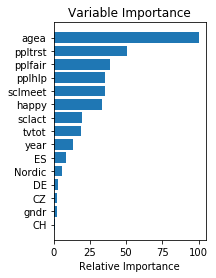

In [9]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()